In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('/content/drive/MyDrive/names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
chars = sorted(list(set(''.join(words))))
s2i = {s:i+1 for i, s in enumerate(chars)}
s2i['.'] = 0
i2s = {i:s for s, i in s2i.items()}
print(s2i)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [46]:
# build the dataset
def generate_dataset(words):
  block_size = 3
  x, y = [], []

  # here the setup is like a rolling window. New context is being appended, old ones being removed, so the context moves/slides along
  for w in words:
    #print(w)
    context = [0] * block_size

    for ch in w + '.':
      ix = s2i[ch]
      x.append(context)
      y.append(ix)
     # print(f"x : {x}, y : {y}")


      #print(''.join(i2s[i] for i in context), '---->', i2s[ix]) # first 3 characters ----> next character in data
      context = context[1:] + [ix] # crop and append
      #print(context)

  x = torch.tensor(x)
  y = torch.tensor(y)
  return x, y

X, Y = generate_dataset(words[:5])


In [5]:
X.shape, Y.shape, Y.dtype
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [6]:
C = torch.randn((27,2)) # incoming nodes/neurons 27 , outgoing nodes/neurons 2
C[5] # here we directly indexed into the 5th row of the weights

tensor([ 0.6689, -0.1265])

In [7]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C
# here we made a one_hot representation to index into 5th row of C

tensor([ 0.6689, -0.1265])

In [8]:
C[[2,3,4,5,5,5]], C[torch.tensor([2,3,4,5,5,5])]
# indexing into a tensor 'C' with lists and tensor

(tensor([[-0.4987,  0.5981],
         [-1.3529, -0.4733],
         [ 0.3843, -0.3583],
         [ 0.6689, -0.1265],
         [ 0.6689, -0.1265],
         [ 0.6689, -0.1265]]),
 tensor([[-0.4987,  0.5981],
         [-1.3529, -0.4733],
         [ 0.3843, -0.3583],
         [ 0.6689, -0.1265],
         [ 0.6689, -0.1265],
         [ 0.6689, -0.1265]]))

In [9]:
C[torch.tensor(([1,4,2,3],[8,6,5,6],[1,4,2,3]))], C[torch.tensor(([1,4,2,3],[8,6,5,6],[1,4,2,3]))].shape

(tensor([[[ 0.8654, -0.4825],
          [ 0.3843, -0.3583],
          [-0.4987,  0.5981],
          [-1.3529, -0.4733]],
 
         [[-0.4179, -0.9007],
          [-1.0386,  1.4259],
          [ 0.6689, -0.1265],
          [-1.0386,  1.4259]],
 
         [[ 0.8654, -0.4825],
          [ 0.3843, -0.3583],
          [-0.4987,  0.5981],
          [-1.3529, -0.4733]]]),
 torch.Size([3, 4, 2]))

In [12]:
C[X].shape

torch.Size([32, 3, 2])

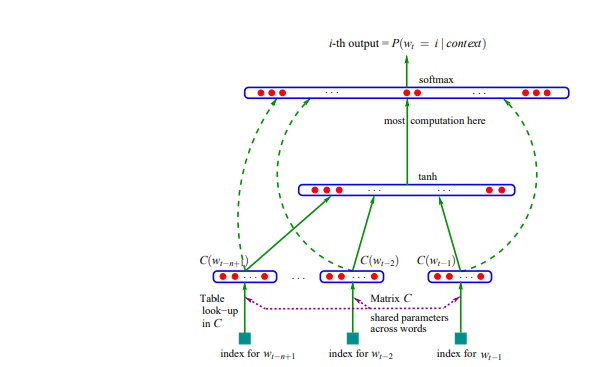

Lookup Table

In [17]:
X[13,2] # value of X at [13,2]

tensor(1)

In [25]:
''' C[X] embeds X (32,3)(example, context) into C (27,2)(labels,embedding space choice)--> so C[X] is (32,3,2)
so C[X][13,2] pulls out the embedding value for (13th example, 2nd char/label/context)->
C[1] pulls embedding value for label/context/char at row 1
'''

C[X][13,2], C[1] # Verifying C[X][13,2] == C[1]; where we know value X[13,2]==[1];
              # so using X[13,2] whose value is '1' is same as directly indexing using value '1'

(tensor([ 0.8654, -0.4825]), tensor([ 0.8654, -0.4825]))

In [27]:
# Embedding inputs/values into 3 * 2 dimensional space
# first layer/input layer
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

1st hidden layer

In [28]:
# 1st hidden layer # W1(6,100)-> 6 because number of inputs to this layer is 3x2 (context x embedding space)
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [ ]:
emb[:,0,:].shape

torch.Size([32, 2])

In [ ]:
# concatanating input layer embeddings to match the W1's 0th index
# but this is hard coded, so when context=5 character, we manually have to add 2 more emb here to concat.
# torch.unbind helps generalize this, and fixes the problem

torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], dim=1).shape


torch.Size([32, 6])

In [ ]:
# what torch.unbind is doing is, along a dimension it is returning the tensors for other dimensions
# so emb(32,3,2)->torch.unbind(emb, dim=1)-> will give us '3' tensors of (32,2); '3' because dim=1 was '3' here
# which are what we were using above to concatanate
# so gave us a list of tensors ->[emb[:,0,:],emb[:,1,:],emb[:,2,:]] ; but in a generalized way

len(torch.unbind(emb, dim=1))# torch.unbind(emb, dim=1)

3

In [ ]:
# @title simple way
# one way of concatanating in a generalized way
torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[ 2.0478,  0.4261,  2.0478,  0.4261,  2.0478,  0.4261],
        [ 2.0478,  0.4261,  2.0478,  0.4261,  0.6709,  0.3568],
        [ 2.0478,  0.4261,  0.6709,  0.3568,  0.2276,  0.9283],
        [ 0.6709,  0.3568,  0.2276,  0.9283,  0.2276,  0.9283],
        [ 0.2276,  0.9283,  0.2276,  0.9283,  0.4015,  0.8780],
        [ 2.0478,  0.4261,  2.0478,  0.4261,  2.0478,  0.4261],
        [ 2.0478,  0.4261,  2.0478,  0.4261,  0.4129, -1.2196],
        [ 2.0478,  0.4261,  0.4129, -1.2196, -0.5769,  0.3505],
        [ 0.4129, -1.2196, -0.5769,  0.3505, -1.0887,  1.9588],
        [-0.5769,  0.3505, -1.0887,  1.9588, -2.7554, -1.3894],
        [-1.0887,  1.9588, -2.7554, -1.3894, -1.0887,  1.9588],
        [-2.7554, -1.3894, -1.0887,  1.9588,  0.4015,  0.8780],
        [ 2.0478,  0.4261,  2.0478,  0.4261,  2.0478,  0.4261],
        [ 2.0478,  0.4261,  2.0478,  0.4261,  0.4015,  0.8780],
        [ 2.0478,  0.4261,  0.4015,  0.8780, -2.7554, -1.3894],
        [ 0.4015,  0.8780, -2.7554, -1.3

In [ ]:
# better way of concatanating in a generalized way
a = torch.arange(18)
a.shape, a

(torch.Size([18]),
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]))

In [ ]:
a.view(3,3,2),a.storage, a.view(2,9)
# view is a more efficient way of changing shape/representation of a tensor
# a.view doesn't do any operations on the tensor values, but changes some
# a.storage values internally to represent the tensor in a new way

# data is always stored in torch.tensor memory as a 1-d vector array; a.storage confirms that
# a.view just manipulates some attributes of the tensor to change the way it is viewed as a tensor

(tensor([[[ 0,  1],
          [ 2,  3],
          [ 4,  5]],
 
         [[ 6,  7],
          [ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15],
          [16, 17]]]),
 <bound method Tensor.storage of tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])>)

In [ ]:
torch.cat(torch.unbind(emb, dim=1), dim=1) == emb.view(32, 6)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

little broadcasting note:
emb.view(emb.shape[0], 6) @ W1 --><br> tensor(32,100)<br>
b1 --> tensor(100)<br>
when tensor(32,100) + tensor(100)<br>
32, 100 -> 32, 100 ->32, 100 <br>
100     ->    ,100 -> 1, 100<br>
now broadcasting will copy the (1,100) tensor 32 times vertically<br>
to perform elementwise addition with tensor(32,100)

In [29]:
# h = emb.view(emb.shape[0], 6) @ W1 + b1
h = emb.view(-1, 6) @ W1 + b1
h = torch.tanh(h)
h.shape, h

(torch.Size([32, 100]),
 tensor([[-0.8677, -0.9576, -0.9724,  ...,  0.7944, -0.8167,  0.6759],
         [ 0.4755, -0.9750, -0.9355,  ..., -0.7973, -0.8337,  0.8854],
         [-0.8745, -0.9693,  0.9081,  ...,  0.7856, -0.9568,  0.4553],
         ...,
         [-0.4381, -0.9137,  0.7260,  ..., -0.8311,  0.5032, -0.5510],
         [-0.9722, -0.1820, -0.9007,  ...,  0.4458, -0.8220,  0.9998],
         [ 0.9815,  0.6517,  0.9998,  ..., -0.9096, -0.9912,  0.9401]]))

Final Layer

In [30]:
W2 = torch.randn((100,27)) # because incoming 100 nodes; outgoing to 27 nodes (all of our possible results)
b2 = torch.randn(27)

In [31]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [32]:
counts = logits.exp()
probs = counts/ counts.sum(dim=1, keepdim=True)
probs.shape

torch.Size([32, 27])

In [36]:
probs[13].sum()

tensor(1.)

In [ ]:
torch.arange(32), Y

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [39]:
# the neural network calculated probabilities of any of the 27 characters appearing, for each (32) example
# Y gives the correct index of the next word. So we use it to find what probability the NN assigned to that index.

probs[torch.arange(32), Y]
# ideally this tensor should output all '1's;
# meaning given next character probability trained with training data,
# we correctly predict the next character Y
loss = -probs[torch.arange(32), Y].log().mean() # neg-log-likelihood loss
loss

tensor(22.0960)

In [ ]:
# --------------------- Start to Finish till now ------------------------

In [ ]:
# @title
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [40]:
# @title
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, W2, b1, b2]

In [41]:
# @title
sum(p.nelement() for p in parameters)

3481

In [ ]:
#  Overfit-> if number of example (32 here) is very low compared to number of parameters we are training (3241 here)
# the model will easily overfit

In [42]:
# @title
for p in parameters:
  p.requires_grad = True

In [43]:
# @title
for _ in range(1000):
  #forward pass
  emb = C[X] # embedding (32,3) raw_data, using look up 'C' into (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32,3,2)->(32,6) @ (6,100) + (100) -> (32,100)
  logits = h @ W2 + b2 # (32,100) @ (100,27) + (27) -> (32,27)

  # counts = logits.exp()
  # probs = counts/counts.sum(dim=1, keepdim=True)
  # loss = -probs[torch.arange(32), Y].log().mean()

  '''
  # F.cross_entropy is prefered over writing your own counts, probs, loss
  # beacuse its implementation causes forward pass, backward pass to be more efficient
  # (beacuse mathmatical expressions are clustered into single expression, also uses several kernels)
  # F.cross_entropy also makes the process numerically stable;
  # it offsets/smooths the logits values so that we don't get 'inf' probability
  '''
  loss = F.cross_entropy(logits, Y)
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

0.2561509907245636


In [ ]:
'''
logits = torch.tensor([-100,-3,0,100]) - 100

# for exp(-100)->0 but exp(100)->inf because runs out of memory
# and this 'inf' will cause its prob to be 'nan'.
# pytorch cross_entropy solves this by finding the max logit value (100 here) and subtracting it from the logits tensor.
# this addition of 100 doesn't affect prob value because it is being NORMALIZED.

counts = logits.exp()

probs = counts / counts.sum(dim=1, keepdim=True)
probs
'''

Here we used 32 training data (5 words),
and used 3481 parameter. This will overfit the parameters/model; because only 32 trainning example makes it easy for the NN to fit these 32 examples

In [ ]:
# @title
logits.max(1) # return the max values and indices along the 1st dim(training example)

torch.return_types.max(
values=tensor([13.3510, 17.8046, 20.5907, 20.6152, 16.7506, 13.3510, 15.9861, 14.1982,
        15.9253, 18.4024, 15.9537, 20.9405, 13.3510, 17.1353, 17.1624, 20.0772,
        13.3510, 16.4689, 15.1473, 17.0675, 18.6008, 15.9788, 10.8855, 10.6977,
        15.5140, 13.3510, 16.2492, 16.9674, 12.7503, 16.2225, 19.0975, 16.0375],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [ ]:
# @title
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

Here we see the logits.max(1) indices and Y labels match exactly, except for the first training example for a word. This is overfitted.
Reason first training example for a word, and Y don't match is, every word has first example where, '...'->'e', '...'->o,'...'->'v' ; so same input predicts different outputs for this specific example set

In [ ]:
# 1111111---------------------------------------------------------------------

## Mini-Batch + How to choose learning rate + learning rate decay + Train-Dev-Test split <br>
Mini-Batch: <br>
```
Training on entire training data will take a lot of time,
 because we are forwarding and backwarding
through all 228146 examples in every pass. So people tend to use randomly
chosen mini-batches.<br>
```
Choose learning rate: <br>
```
We will check different learning rate from where the loss starts to get optimized
to lr where loss start to explodes (e.g. 0.001 to 1). Then create linspace values between
0.001 & 1. Or create linspace(-3,0,1000) and give those values some non-linearity.
which will create learning rate between (0.001, 1)
```
Learning rate Decay: <br>
```
1)Keep running the model on mini-batches and entire dataset to get loss values.<br>
2) Monitor the losses on the entire dataset. <br>
3)When the loss decrease starts to plateau, decrease the learning rate and train for a few more steps.
```

In [ ]:
# 22222222--------------------------------------------------------------------

In [47]:
# @title #####Split dataset
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train, Y_train = generate_dataset(words[:n1])
X_dev, Y_dev = generate_dataset(words[n1:n2])
X_test, Y_test = generate_dataset(words[n2:])

In [48]:
X_train.shape, X_dev.shape, X_test.shape

(torch.Size([182580, 3]), torch.Size([22767, 3]), torch.Size([22799, 3]))

In [ ]:
# @title
X, Y = generate_dataset(words)

In [ ]:
# @title #####LR CHECK initialize
'''
We will check different learning rate from where the loss starts to get optimized
to lr where loss start to explodes (e.g. 0.001 to 1). Then create linspace values between
0.001 & 1. Or create linspace(-3,0,1000) and give those values some non-linearity.
which will create learning rate between (0.001, 1)
'''
# lr = torch.linspace(0.001,1,1000)
lre = torch.linspace(-3,0,1000)
lrs = 10 ** lre
#lrs

In [49]:
# @title ##### Initialize params
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, W2, b1, b2]
for p in parameters:
  p.requires_grad = True

In [53]:
# @title #####Training on Mini Batch
'''
Training on entire training data will take a lot of time,
 because we are forwarding and backwarding
through all 228146 examples in every pass. So people tend to use randomly
chosen mini-batches.
'''
lri = []
lossi = []
print(f"Num of Examples: {X_train.shape[0]}")
for i in range(10000):

  # mini-batch construct
  ix = torch.randint(0, X_train.shape[0], (32,)) # X_train.shape -> [182580, 3] ->pick 32 random row index from 182580 example rows

  #forward pass
  emb = C[X_train[ix]]  # X[ix] to grab only mini-batch examples
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Y_train[ix]) # Y[ix] mini batch
  #print(f"Loss: {loss.item()}")

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  for p in parameters:
    p.data += -0.1 * p.grad

  # --------- TRACK STAT --------------
  ###lri.append(lr)
  #lri.append(lre[i])
  #lossi.append(loss.item())
  # ------------------------------------
print(f"Loss on mini batches: {loss.item()}")

Num of Examples: 182580
Loss on mini batches: 2.090893030166626


In [54]:
# @title #####Loss on Train, Dev dataset
emb = C[X_train]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
print(f"Loss on Train dataset X: {loss.item()}")

emb = C[X_dev]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev)
print(f"Loss on Dev dataset X: {loss.item()}")

# WE see that train and dev losses are roughly equal. So we are not overfitting
# the NN, but underfitting it. Which means our NN is not powerful enough to
# overfit on the data given only 3481 parameters, and since the NN is so small
# it is actually underfitting.

Loss on Train dataset X: 2.3994836807250977
Loss on Dev dataset X: 2.3978967666625977


In [ ]:
# @title
# after tracking the learning rate and plotting, we find the optimum learning rate.
# then we get rid of the tracking and use the optimum lr for training; at a higher epoch

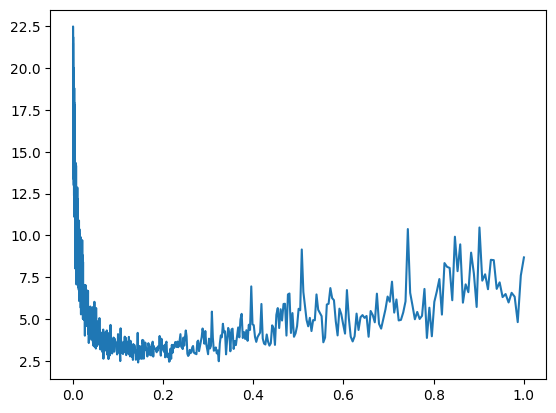

In [ ]:
# @title
plt.plot(lri, lossi) # plot (lrs vs loss)

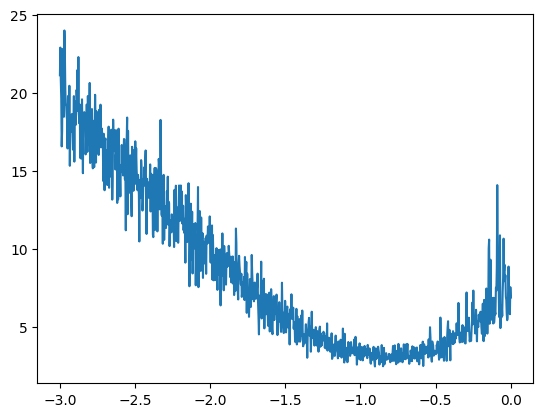

In [ ]:
# @title
plt.plot(lri, lossi) # loss (lre, loss) //lre-> exp(lr)

So whats happening is, for the sake of computational speed we are using mini-batches; which will not give us the exact gradient but an approximate gradient. <br>
Training on the entire dataset gives the exact gradient but training is slow <br>
The approx gradient still gives a good enough value of loss

In [ ]:
# @title
torch.randint(0, X.shape[0], (32,))
# create a tensor(32,) of numbers between 0 and X.shape[0]

tensor([ 28339, 144705, 143443, 105167, 126153, 177991,  12576,   9089,  55889,
        214944, 197161, 207753,  20559, 167496, 195865, 176199, 201944, 183143,
         55527, 198310, 178458,  44699, 142252, 212151, 196332, 131882, 188680,
         99612,  30267, 112996, 189750, 172617])

In [ ]:
# 222222222222222222-------------------------------------------------------------------

## Experimenting with larger hidden layer, larger embeddings

In [ ]:
import random

In [ ]:
# @title #####split_dataset
def split_dataset(words):
  random.seed(42)
  random.shuffle(words)
  n1 = int(0.8*len(words))
  n2 = int(0.9*len(words))

  X_train, Y_train = generate_dataset(words[:n1])
  X_dev, Y_dev = generate_dataset(words[n1:n2])
  X_test, Y_test = generate_dataset(words[n2:])

  return X_train, Y_train, X_dev, Y_dev, X_test, Y_test

In [ ]:
# @title #####initialize_parameters
def initialize_parameters():
  g = torch.Generator().manual_seed(2147483647)
  C = torch.randn((27,2), generator=g)
  W1 = torch.randn((6,300), generator=g)
  b1 = torch.randn((300), generator=g)
  W2 = torch.randn((300,27), generator=g)
  b2 = torch.randn((27), generator=g)
  parameters = [C, W1, W2, b1, b2]
  ss = sum(p.nelement() for p in parameters)
  print(f"Number of parameters: {ss}")
  for p in parameters:
    p.requires_grad = True

  return parameters

In [ ]:
lre = torch.linspace(-3,0,1000)
lrs = 10 ** lre
lrs.shape

torch.Size([1000])

In [ ]:
def train_NN(X, Y, params:list, lrs, epoch=1000, batch=32):

  print(f"Num of Examples: {X.shape[0]}")
  for i in range(epoch):
    lri = []
    lossi = []
    stepi = []
    C  = params[0]
    W1 = params[1]
    W2 = params[2]
    b1 = params[3]
    b2 = params[4]

    # mini-batch construct
    ix = torch.randint(0, X.shape[0], (batch,))

    #forward pass
    emb = C[X[ix]]  # X[ix] to grab only mini-batch examples
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2

    loss = F.cross_entropy(logits, Y[ix]) # Y[ix] mini batch

    # backward pass
    for p in params:
      p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in params:
      p.data += -lr * p.grad

    #-------Track Stat---------
    stepi.append(i)
    lri.append(lre[i])
    lossi.append(loss.item())

  print(f"Loss on mini batches: {loss.item()}")

In [ ]:
# @title #####Evalute Model
def evaluate_model(X, Y, params):
  C  = params[0]
  W1 = params[1]
  W2 = params[2]
  b1 = params[3]
  b2 = params[4]
  emb = C[X]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  print(f"Loss on dataset X: {loss.item()}")

In [ ]:
X_train, Y_train, X_dev, Y_dev, X_test, Y_test = split_dataset(words)
#parameter_list = initialize_parameters()
#params = parameter_list

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, W2, b1, b2]
ss = sum(p.nelement() for p in parameters)
print(f"Number of parameters: {ss}")
for p in parameters:
  p.requires_grad = True

Number of parameters: 11897


In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
print(f"Num of Examples: {X_train.shape[0]}")
for i in range(50000):
  # C  = params[0]
  # W1 = params[1]
  # W2 = params[2]
  # b1 = params[3]
  # b2 = params[4]

  # mini-batch construct
  ix = torch.randint(0, X_train.shape[0], (32,))

  #forward pass
  emb = C[X_train[ix]]  # X[ix] to grab only mini-batch examples
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2

  loss = F.cross_entropy(logits, Y_train[ix]) # Y[ix] mini batch

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  for p in parameters:
    p.data += -0.01 * p.grad

  #-------Track Stat---------
  stepi.append(i)
  #lri.append(lre[i])
  lossi.append(loss.log10().item())

print(f"Loss on mini batches: {loss.item()}")

Num of Examples: 182661
Loss on mini batches: 2.130826950073242


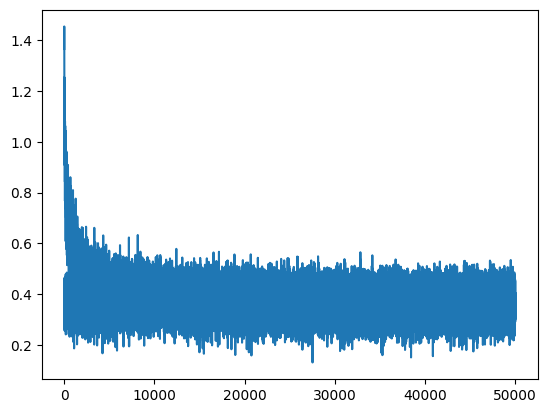

In [ ]:
plt.plot(stepi, lossi)
# the oscilating/noise in the graph can be due to
# 1) small batch sizes, creating different/oscilating loss

In [ ]:
plt.plot(stepi[60000:90000], lossi[60000:90000])

In [ ]:
evaluate_model(X_train, Y_train, parameters)

Loss on dataset X: 2.0958967208862305


In [ ]:
evaluate_model(X_dev, Y_dev, parameters)

Loss on dataset X: 2.1354711055755615


The model is not improving significantly after many runs, with larger hidden layer. <br>
So the bottleneck now could be the embedding layer. We may have embedded too many vectors in too cramped of a space

#### Becareful of Hard coding parameters and hyperparameters <br>
Ideally we would train the model on training data, with different hyperparameters. Then choose the hyperparameters that give lowest loss on Dev set. So we use dev set to tune our range of hyperparameters. <br>
Typically we would have to run many experiments to scrutinize every single hyperparameter to our liking. Rather than hardcoding these in use hyperparameter lists,sets, objects etc to automate the process. Since many experiment need to be conducted.

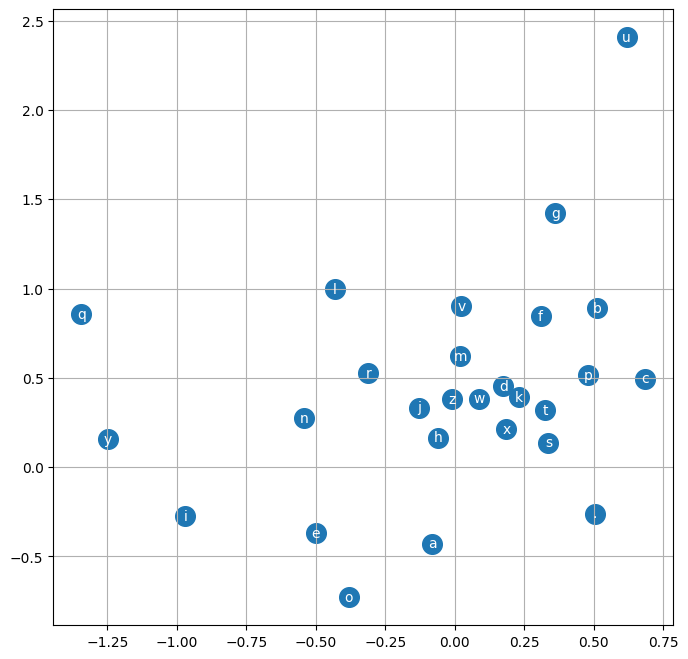

In [ ]:
# @title #####Visualize the 2-d embeddings before increasing dimension
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), i2s[i], ha='center', va='center', color='white')
plt.grid('minor')

Model changes <br>
1) changed hidden layer size a)(6,300), b)(30,200) <br>
2) changed embeddings size a)(27,2) b)(27,10) <br>

(m,3) ->(m,3,2)-> (m,6)@(6,300)-> <br>
(m,3) ->(m,3,10)-> (m,10)@(30,200)-> <br>

In [ ]:
# @title Sampling
block_size = 3
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  out = []
  context = [0] * block_size # initialize with all '...'
  while True:
    emb = C[torch.tensor([context])] # (1, block_size, embed_dim)
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(i2s[i] for i in out))

junide.
janasah.
presay.
adria.
jirrito.
cassa.
ezmadianaa.
yanilenias.
dedaine.
imer.


In [ ]:
context = [0] * 3
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [ ]:
W1.shape

torch.Size([30, 200])

In [ ]:
logits#.shape, Y_train[ix].shape

tensor([[3.9474e-01, 7.3698e-01, 2.4233e-01, 7.9942e-01, 5.3394e-01, 4.1705e-01,
         1.0992e-02, 9.0492e-01, 1.9570e-02, 2.8322e-01, 2.5903e-01, 8.0364e-01,
         5.6648e-02, 8.6516e-01, 5.6175e-01, 3.0954e-01, 9.1783e-01, 2.3881e-02,
         8.6608e-01, 8.6255e-02, 4.7198e-01, 2.4900e-01, 8.6844e-01, 8.5349e-01,
         4.2401e-01, 3.5337e-01, 3.9592e-01],
        [3.6129e-01, 7.0401e-02, 9.3746e-01, 3.2625e-01, 5.7495e-01, 8.8832e-01,
         1.5885e-01, 6.8659e-01, 1.3876e-01, 2.4358e-01, 6.3273e-01, 4.0453e-01,
         3.5908e-01, 1.0303e-01, 3.7532e-01, 4.1474e-01, 2.5697e-01, 4.2151e-01,
         9.1186e-01, 5.0633e-02, 4.5804e-01, 2.3592e-01, 3.3546e-01, 3.4612e-01,
         2.4472e-01, 2.3144e-01, 1.1300e-01],
        [4.3040e-02, 8.1850e-01, 8.3370e-01, 5.7403e-01, 8.1941e-01, 9.8996e-01,
         9.1037e-01, 3.6037e-01, 7.4562e-02, 8.2284e-01, 6.5678e-01, 8.9887e-01,
         4.1241e-01, 5.9913e-01, 6.1268e-01, 3.3468e-01, 4.9961e-01, 6.7386e-01,
         3.9389e-

In [ ]:
torch.nn.init.uniform_(logits, 0, 1)

tensor([[3.9474e-01, 7.3698e-01, 2.4233e-01, 7.9942e-01, 5.3394e-01, 4.1705e-01,
         1.0992e-02, 9.0492e-01, 1.9570e-02, 2.8322e-01, 2.5903e-01, 8.0364e-01,
         5.6648e-02, 8.6516e-01, 5.6175e-01, 3.0954e-01, 9.1783e-01, 2.3881e-02,
         8.6608e-01, 8.6255e-02, 4.7198e-01, 2.4900e-01, 8.6844e-01, 8.5349e-01,
         4.2401e-01, 3.5337e-01, 3.9592e-01],
        [3.6129e-01, 7.0401e-02, 9.3746e-01, 3.2625e-01, 5.7495e-01, 8.8832e-01,
         1.5885e-01, 6.8659e-01, 1.3876e-01, 2.4358e-01, 6.3273e-01, 4.0453e-01,
         3.5908e-01, 1.0303e-01, 3.7532e-01, 4.1474e-01, 2.5697e-01, 4.2151e-01,
         9.1186e-01, 5.0633e-02, 4.5804e-01, 2.3592e-01, 3.3546e-01, 3.4612e-01,
         2.4472e-01, 2.3144e-01, 1.1300e-01],
        [4.3040e-02, 8.1850e-01, 8.3370e-01, 5.7403e-01, 8.1941e-01, 9.8996e-01,
         9.1037e-01, 3.6037e-01, 7.4562e-02, 8.2284e-01, 6.5678e-01, 8.9887e-01,
         4.1241e-01, 5.9913e-01, 6.1268e-01, 3.3468e-01, 4.9961e-01, 6.7386e-01,
         3.9389e-